<a href="https://colab.research.google.com/github/g-e-mm/Digit_Recognizer_using_NeuralNetworks/blob/main/Digit_Recognizer_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><b><u> DIGIT RECOGNIZER WITH NEURAL NETWORKS</u></b></center>

---



# Introduction

<u>**Problem Statement**</u> <br><br>Accurate and efficient digit recognition is a critical component in various applications, including image processing, data entry, and optical character recognition (OCR). However, existing methods often struggle with challenges such as handwritten digit variability, noisy images, and real-world image complexities.

This project aims to develop a robust and accurate digit recognition system using deep learning techniques to address these challenges and improve the overall performance of digit classification tasks.

<b><u> Approach to Problem </u></b>
1. Load Data and Libraries
2. Data Visualization
3. Divide the data into X (images) and Y (Labels)
4. Divide the data into train and test
5. Apply ML and Evaluate
6. Single Layer Perceptron and Evaluate
7. Multilayer Perceptron and Evaluate
8. Deep Learning using Tensorflow and Keras



# Load Data and Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/IMARTICUS/Neural Networks/Digit Recognizer.zip'

Archive:  /content/drive/MyDrive/IMARTICUS/Neural Networks/Digit Recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Visualization

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


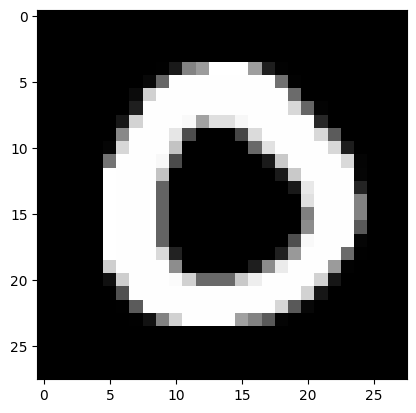

In [ ]:
features = ['pixel{}'.format(pixel_num) for pixel_num in range(0,784)]
row_to_examine = 4
image_data = np.reshape(train[features][row_to_examine : row_to_examine+1].to_numpy(), (28,28))
_ = plt.imshow(image_data , cmap = 'gray')

# Splitting of Data

In [ ]:
x = train.drop('label' , axis = 1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# Model Evaluation Function

In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

#Fit the Model
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_rf)

The Accuracy of the Model is: 1.0
[[3336    0    0    0    0    0    0    0    0    0]
 [   0 3738    0    0    0    0    0    0    0    0]
 [   0    0 3321    0    0    0    0    0    0    0]
 [   0    0    0 3495    0    0    0    0    0    0]
 [   0    0    0    0 3246    0    0    0    0    0]
 [   0    0    0    0    0 3022    0    0    0    0]
 [   0    0    0    0    0    0 3350    0    0    0]
 [   0    0    0    0    0    0    0 3532    0    0]
 [   0    0    0    0    0    0    0    0 3227    0]
 [   0    0    0    0    0    0    0    0    0 3333]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      1.00      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
  

In [ ]:
model_eval(y_test , y_hat_test_rf)

The Accuracy of the Model is: 0.97
[[785   0   1   0   1   2   2   0   4   1]
 [  0 928   6   3   2   2   1   2   2   0]
 [  4   1 825   0   7   1   6   5   7   0]
 [  1   1  10 819   0  12   1   2   9   1]
 [  0   1   1   0 814   0   4   1   0   5]
 [  3   1   0  11   1 742   6   0   6   3]
 [  5   2   1   0   3   2 769   0   5   0]
 [  0   4  11   2   5   0   0 836   1  10]
 [  0   7  10   9   5  10   3   0 783   9]
 [  4   0   1  13   9   3   0   7   6 812]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       796
           1       0.98      0.98      0.98       946
           2       0.95      0.96      0.96       856
           3       0.96      0.96      0.96       856
           4       0.96      0.99      0.97       826
           5       0.96      0.96      0.96       773
           6       0.97      0.98      0.97       787
           7       0.98      0.96      0.97       869
           8       0.95      0.94      0.94    

# Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 50)

gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_gb)

The Accuracy of the Model is: 0.94
[[3267    0    4    6    5    3   13    2   35    1]
 [   1 3670   10   14    5    4   11    5   14    4]
 [  21   14 3094   44   31    4   14   40   44   15]
 [   8   21   63 3163    7   74    7   40   71   41]
 [   7    9   13    3 3038    6   17   10   20  123]
 [  35   15    8   90   20 2738   41    6   38   31]
 [  27    5    6    2   25   60 3191    2   32    0]
 [  13   22   48   15   29    7    0 3300    9   89]
 [  12   37   19   67   12   27   12    8 2970   63]
 [  15   12    9   44   97   14    1   78   30 3033]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3336
           1       0.96      0.98      0.97      3738
           2       0.95      0.93      0.94      3321
           3       0.92      0.91      0.91      3495
           4       0.93      0.94      0.93      3246
           5       0.93      0.91      0.92      3022
           6       0.96      0.95      0.96      3350
 

In [ ]:
model_eval(y_test , y_hat_test_gb)

The Accuracy of the Model is: 0.92
[[773   0   0   3   3   3   1   0  12   1]
 [  0 925   6   1   3   0   6   1   3   1]
 [  9   5 778   6  16   2   9  10  21   0]
 [  5   1  13 774   0  23   6   6  16  12]
 [  1   4   4   2 788   0   4   2   4  17]
 [  6   5   2  23  10 673  12   2  21  19]
 [  9   4   3   0   7  17 735   1  11   0]
 [  2   3  11   3  16   1   0 803   2  28]
 [  3  18   9  21   8  16   6   1 730  24]
 [  4   0   1  15  24   5   0  23   8 775]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       796
           1       0.96      0.98      0.97       946
           2       0.94      0.91      0.92       856
           3       0.91      0.90      0.91       856
           4       0.90      0.95      0.93       826
           5       0.91      0.87      0.89       773
           6       0.94      0.93      0.94       787
           7       0.95      0.92      0.93       869
           8       0.88      0.87      0.88    

# Perceptron

**Single Layer Perceptron**<br>
A Single Layer Perceptron is the simplest type of artificial neural network, consisting of an input layer and an output layer.

* Linear Classifier: It can only classify linearly separable data.
* Binary Classification: Typically used for binary classification tasks (e.g., yes/no, true/false).<br>
* Limitations: Limited to simple problems due to its inability to handle complex patterns.<br>
* Basic Building Block: Serves as a foundational concept for understanding more complex neural networks.<br>
* The weights of the perceptron are updated using the perceptron learning rule to minimize errors.<br>


In [ ]:
per = Perceptron()
per.fit(x_train , y_train)
y_hat_test_per=per.predict(x_test)
y_hat_train_per=per.predict(x_train)

In [ ]:
model_eval(y_train , y_hat_train_per)

The Accuracy of the Model is: 0.89
[[3245    0    8    3    5    5   35    0   34    1]
 [   0 3661   13    3    3    2    6    3   42    5]
 [  13   53 2871   25   31    5  125   32  157    9]
 [  13   39  131 2889   16   38   57   25  247   40]
 [   4   14   10    0 3035    7   50    8   54   64]
 [  28   27   19  193   50 2188  198   11  272   36]
 [  14    6    2    0   10   16 3288    0   14    0]
 [  12   22   43    3   48    4    5 3214   39  142]
 [  18   97   25   36   37   75   51   10 2841   37]
 [  19   15   21   29  263   41    6  138  137 2664]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3336
           1       0.93      0.98      0.95      3738
           2       0.91      0.86      0.89      3321
           3       0.91      0.83      0.87      3495
           4       0.87      0.93      0.90      3246
           5       0.92      0.72      0.81      3022
           6       0.86      0.98      0.92      3350
 

# Multi Layer Perceptron

**Multi-Layer Perceptron (MLP)**
An MLP is a feedforward artificial neural network with multiple layers, including an input layer, one or more hidden layers, and an output layer.

* Non-linear Classification: Can handle complex, non-linearly separable data.<br>
* Backpropagation: Uses the backpropagation algorithm to train the network by adjusting weights based on the error.<br>
* Universal Approximation Theorem: MLPs can approximate any continuous function with sufficient hidden units.<br>
* Overfitting: Prone to overfitting if not regularized properly.<br>
* Widely Used: A fundamental building block for many deep learning architectures.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=20, verbose=1)
mlp.fit(x_train, y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 3.29294524
Iteration 2, loss = 0.75301912
Iteration 3, loss = 0.52795344
Iteration 4, loss = 0.42614440
Iteration 5, loss = 0.36145375
Iteration 6, loss = 0.32234693
Iteration 7, loss = 0.28830756
Iteration 8, loss = 0.26578685
Iteration 9, loss = 0.23981366
Iteration 10, loss = 0.22168303
Iteration 11, loss = 0.21339182
Iteration 12, loss = 0.19862708
Iteration 13, loss = 0.18369593
Iteration 14, loss = 0.17574910
Iteration 15, loss = 0.17027756
Iteration 16, loss = 0.15998234
Iteration 17, loss = 0.15349563
Iteration 18, loss = 0.14920068
Iteration 19, loss = 0.14361712
Iteration 20, loss = 0.14145209
Iteration 21, loss = 0.13279992
Iteration 22, loss = 0.13371411
Iteration 23, loss = 0.12700284
Iteration 24, loss = 0.11916659
Iteration 25, loss = 0.11284599
Iteration 26, loss = 0.10860614
Iteration 27, loss = 0.10813824
Iteration 28, loss = 0.10090281
Iteration 29, loss = 0.10044453
Iteration 30, loss = 0.10205515
Iteration 31, loss = 0.09484694
Iteration 32, los

In [ ]:
model_eval(y_train , y_hat_train_mlp)


The Accuracy of the Model is: 0.99
[[3325    0    0    1    2    0    1    1    4    2]
 [   0 3726    2    2    0    1    1    1    4    1]
 [   3    1 3297    6    2    0    0    6    3    3]
 [   0    0    5 3474    0    3    0    0    5    8]
 [   0    0    0    0 3231    0    0    1    0   14]
 [   2    0    3    8    1 2998    4    1    1    4]
 [   5    0    0    0    8    5 3331    0    1    0]
 [   0    1    1    4    1    0    0 3523    0    2]
 [   1    0    3   25    4    0    0    0 3189    5]
 [   1    0    0   19    3    1    0   10    8 3291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      0.99      0.99      3321
           3       0.98      0.99      0.99      3495
           4       0.99      1.00      0.99      3246
           5       1.00      0.99      0.99      3022
           6       1.00      0.99      1.00      3350
 

In [ ]:
model_eval(y_test , y_hat_test_mlp)

The Accuracy of the Model is: 0.95
[[777   0   2   0   1   0   5   0   8   3]
 [  0 927   5   2   2   1   1   2   5   1]
 [  4   3 805  19   9   1   1   7   7   0]
 [  1   0  13 818   0  10   1   1   7   5]
 [  2   1   4   2 794   0   1   3   3  16]
 [  4   1   1  18   1 720  10   2  13   3]
 [ 10   0   6   0  10   4 756   0   1   0]
 [  1   2   7   8   4   2   0 831   0  14]
 [  5   7   3  35   7   7   6   1 755  10]
 [  2   0   1  16  12   2   0  21   5 796]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.99      0.98      0.98       946
           2       0.95      0.94      0.95       856
           3       0.89      0.96      0.92       856
           4       0.95      0.96      0.95       826
           5       0.96      0.93      0.95       773
           6       0.97      0.96      0.96       787
           7       0.96      0.96      0.96       869
           8       0.94      0.90      0.92    

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128), random_state=20, verbose=1)
mlp.fit(x_train, y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.69284211
Iteration 2, loss = 0.53861408
Iteration 3, loss = 0.30645004
Iteration 4, loss = 0.18875760
Iteration 5, loss = 0.13178726
Iteration 6, loss = 0.09973344
Iteration 7, loss = 0.08203179
Iteration 8, loss = 0.06922117
Iteration 9, loss = 0.06831816
Iteration 10, loss = 0.05526278
Iteration 11, loss = 0.05434853
Iteration 12, loss = 0.05802920
Iteration 13, loss = 0.05796601
Iteration 14, loss = 0.07997399
Iteration 15, loss = 0.07580212
Iteration 16, loss = 0.07837304
Iteration 17, loss = 0.07056734
Iteration 18, loss = 0.06858815
Iteration 19, loss = 0.06040460
Iteration 20, loss = 0.06889365
Iteration 21, loss = 0.07296998
Iteration 22, loss = 0.05315797
Iteration 23, loss = 0.04910409
Iteration 24, loss = 0.06262237
Iteration 25, loss = 0.06570048
Iteration 26, loss = 0.06295611
Iteration 27, loss = 0.06144899
Iteration 28, loss = 0.05053448
Iteration 29, loss = 0.04875956
Iteration 30, loss = 0.04884353
Iteration 31, loss = 0.04093552
Iteration 32, los

In [ ]:
model_eval(y_train , y_hat_train_mlp)

The Accuracy of the Model is: 0.99
[[3329    1    0    0    0    0    5    0    1    0]
 [   0 3735    0    0    0    0    0    0    3    0]
 [   0    0 3303    4    0    0    0    4    9    1]
 [   0    1    4 3473    0   12    0    1    4    0]
 [   3    2    0    0 3224    2    0    1    5    9]
 [   0    0    0    2    0 3012    0    0    7    1]
 [   2    0    0    0    1    8 3333    0    6    0]
 [   2    7    2    0    0    0    1 3507    1   12]
 [   1    1    0    4    0    2    0    0 3218    1]
 [   0    0    0   18    1    4    0    0   23 3287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      0.99      1.00      3321
           3       0.99      0.99      0.99      3495
           4       1.00      0.99      1.00      3246
           5       0.99      1.00      0.99      3022
           6       1.00      0.99      1.00      3350
 

In [ ]:
model_eval(y_test , y_hat_test_mlp)

The Accuracy of the Model is: 0.97
[[781   1   1   0   2   0   6   0   4   1]
 [  0 934   0   4   1   0   0   1   6   0]
 [  1   3 824   6   4   1   4   5   7   1]
 [  0   1   4 823   0  17   1   2   7   1]
 [  2   3   2   1 795   0   3   2   3  15]
 [  1   1   1   6   1 744   6   0  12   1]
 [  3   2   1   0   2  10 766   0   3   0]
 [  1   5   5   1   1   3   0 839   2  12]
 [  0   8   4   7   2   5   2   1 804   3]
 [  3   0   0  23   3   3   0   5   8 810]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       796
           1       0.97      0.99      0.98       946
           2       0.98      0.96      0.97       856
           3       0.94      0.96      0.95       856
           4       0.98      0.96      0.97       826
           5       0.95      0.96      0.96       773
           6       0.97      0.97      0.97       787
           7       0.98      0.97      0.97       869
           8       0.94      0.96      0.95    

Clearly, compared to the Single Layer Perceptron, we not that the accuracy of the multi layer perceptron is much better.

# TensorFlow and Keras


## Approach to Keras & TensorFlow
* Load the data and libraries.
* One Hot Encoding
* Declare the model
  * Sequential Model - sequence of layers - self made models
  * Functional Model - Multi Model/Transfer layer - models created by Independent Creators
* Declare the layer
  * Dense, dropout layer
  * Number of neurons we need, Activation Functions
* Compile the Model
  * Optimizer - SGD/Adam
  * Loss Function - Cross Entropy, RMSE, MSE
  * Metrics - Accuracy, F1, Precision and Recall are some metrics we've
* Fit the model
  * pass x train and y train
  * pas x test and y test
  * Define epochs and batch size
* Predict and evaluate the model

In [ ]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical

One Hot Encoding

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train)
print(y_train_ohe)

3698     4
13466    7
21701    7
29814    5
17325    8
        ..
40059    4
28017    2
29199    5
40061    6
17673    0
Name: label, Length: 33600, dtype: int64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


declaring the model

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #layer 1 and Input Layer
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #layer 2
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #layer 3
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #layer 4
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #layer 5
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) #output layer - 10 because we have 10 output - softmax converts into probablity

**Arguments in Dense**

* units: Positive integer, dimensionality of the output space.
* activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
* use_bias: Boolean, whether the layer uses a bias vector.
* kernel_initializer: Initializer for the kernel weights matrix - can be initialised as a normal distribution by replacing the hyper
 parameter with "tf.random.normal" or from an uniform distribution(default)
* bias_initializer: Initializer for the bias vector - all biases start with 0
* kernel_regularizer: Regularizer function applied to the kernel weights matrix - for l1 and l2
* bias_regularizer: Regularizer function applied to the bias vector for l1 and/or l2
  * much better to use drop out than regularizers above
* activity_regularizer: Regularizer function applied to the output of the layer (its "activation").
* kernel_constraint: Constraint function applied to the kernel weights matrix.
* bias_constraint: Constraint function applied to the bias vector.
* lora_rank: Optional integer. If set, the layer's forward pass will implement LoRA (Low-Rank Adaptation) with the provided rank. LoRA sets the layer's kernel to non-trainable and replaces it with a delta over the original kernel, obtained via multiplying two lower-rank trainable matrices. This can be useful to reduce the computation cost of fine-tuning large dense layers. You can also enable LoRA on an existing Dense layer by calling layer.enable_lora(rank).
* Input and Output shapes


drop out - drops out layers in random - observes the model  and deletes if the dropped out neurons do not affect the model

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
InputLayer = (784*64)+64
Layer1 = (64*64)+64
Layer2 = (64*64)+64
OutputLayer = (64*10)+10
parameters = InputLayer+ Layer1 + Layer2 + OutputLayer
print("Input Layer", InputLayer)
print("Layer 1", Layer1)
print("Layer 2", Layer2)
print("Output Layer", OutputLayer)
print("Total Parameters", parameters)

Input Layer 50240
Layer 1 4160
Layer 2 4160
Output Layer 650
Total Parameters 59210


Compiling

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the Model

In [ ]:
hist = model.fit(x_train, y_train_ohe, batch_size=128, epochs=100, validation_data=(x_test, y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.5625 - loss: 6.4834 - val_accuracy: 0.9271 - val_loss: 0.2493
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8907 - loss: 0.3698 - val_accuracy: 0.9404 - val_loss: 0.2047
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9222 - loss: 0.2677 - val_accuracy: 0.9469 - val_loss: 0.1895
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9401 - loss: 0.2018 - val_accuracy: 0.9596 - val_loss: 0.1439
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9494 - loss: 0.1760 - val_accuracy: 0.9625 - val_loss: 0.1416
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9549 - loss: 0.1552 - val_accuracy: 0.9643 - val_loss: 0.1343
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.9628 - loss: 0.1261 - val_accuracy: 0.9658 - val_loss: 0.1230
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9656 - loss: 0

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

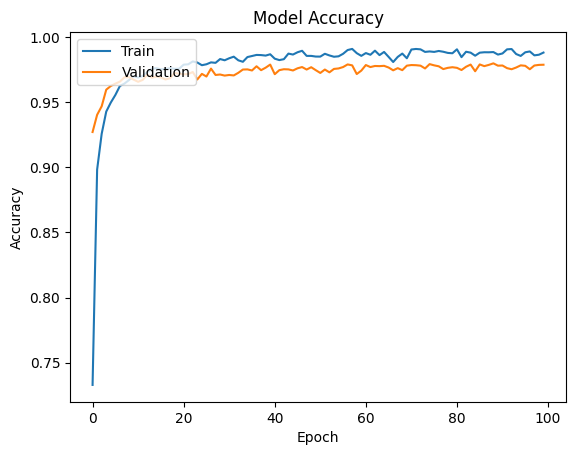

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

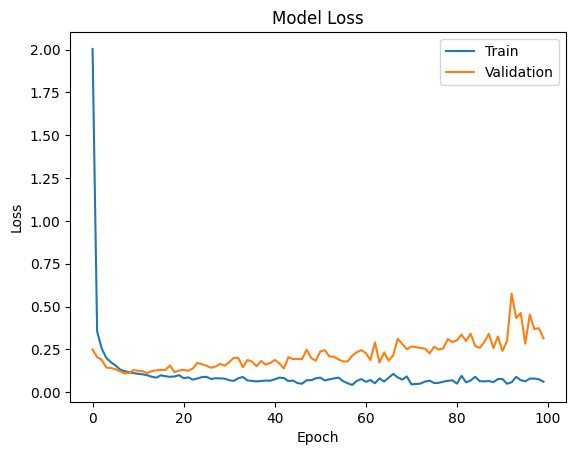

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Model Evaluation

y_hat_train_dense = model.predict(x_train)<br>
y_hat_test_dense = model.predict(x_test)

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train), axis=1)
y_hat_test_dense = np.argmax(model.predict(x_test), axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
model_eval(actual=y_train, predicted=y_hat_train_dense)

The Accuracy of the Model is: 1.0
[[3329    0    0    0    0    0    0    0    7    0]
 [   0 3736    0    0    0    0    0    0    2    0]
 [   0    0 3315    1    0    0    0    2    3    0]
 [   0    0    0 3485    0    1    0    0    8    1]
 [   0    0    0    0 3243    0    1    1    0    1]
 [   0    0    0    1    0 3016    0    0    4    1]
 [   0    0    0    0    0    0 3350    0    0    0]
 [   0    0    0    0    0    0    0 3532    0    0]
 [   1    0    0    1    1    2    1    0 3220    1]
 [   0    0    0    0   11    0    0    4    3 3315]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      1.00      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
  

In [ ]:
model_eval(actual=y_test, predicted=y_hat_test_dense)

The Accuracy of the Model is: 0.98
[[780   0   2   0   1   0   4   0   8   1]
 [  0 935   1   2   2   0   0   3   3   0]
 [  0   2 839   1   3   0   0   5   6   0]
 [  1   0   2 840   0   5   0   2   6   0]
 [  0   1   0   0 819   0   2   0   3   1]
 [  2   0   0   7   0 748   7   0   8   1]
 [  3   1   0   0   2   1 777   0   3   0]
 [  1   0   8   1   2   1   0 853   2   1]
 [  0   8   1   2   1   4   4   3 805   8]
 [  1   0   0   2  10   1   0  10   5 826]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       796
           1       0.99      0.99      0.99       946
           2       0.98      0.98      0.98       856
           3       0.98      0.98      0.98       856
           4       0.97      0.99      0.98       826
           5       0.98      0.97      0.98       773
           6       0.98      0.99      0.98       787
           7       0.97      0.98      0.98       869
           8       0.95      0.96      0.96    